***
<center><img src='https://github.com/HesamAsad/HesamAsad.github.io/blob/main/images/LOGO_EN_blue.png?raw=true' width=250/></center>

# <center>
## <center><span style='font-family:"Times New Roman"'> <span style='background:dark'>  <font color='#1966ab'> Sharif University of Technology</font>  <br>  <br>  <font color='#FFFFCC'>Masoud Tahmasbi Fard </font> <br> <font color='#FFFFCC'>Student ID: 402200275 </font>  <br>  <br> <font color='#33FFCC'>EE167: Data Networks</font> <br>  <font color='#FFFF00'>HW #3 - Part 2 -WSim </font>
<br>

***

# $\text{Installing Prerequisites}$

In [ ]:
! python.exe -m pip install --upgrade pip

In [ ]:
! python -m pip install wxPython

In [ ]:
! python -m pip install matplotlib

In [1]:
import random, sys, wx, math, time
from PS3_wsim import *
import matplotlib.pyplot as p

## $\text{TDMA}$

In [5]:
class TDMANode(WirelessNode):
    def __init__(self,location,network,retry):
        WirelessNode.__init__(self,location,network,retry)

    def channel_access(self,time,ptime,numnodes):
        return time % (ptime*numnodes) == ptime*self.get_id()

    def on_collision(self,packet):
        pass

    def on_xmit_success(self,packet):
        pass

In [6]:
class TDMAWirelessNetwork(WirelessNetwork):
    def __init__(self,n,chantype,ptime,dist,load,retry,backoff,
		 skew=SOURCE_NOSKEW,qmax=0,simtime=10000):
        WirelessNetwork.__init__(self,n,chantype,ptime,dist,load,retry,backoff,
                                 skew,qmax,simtime)
    def make_node(self,loc,retry):
        return TDMANode(loc,self,retry)

***
### $\text{Warm Up 1}$

Protocol: TDMA
  Node 0 attempts 120 success 120 coll 0
  Node 1 attempts 124 success 124 coll 0
  Node 2 attempts 118 success 118 coll 0
  Node 3 attempts 121 success 121 coll 0
  Node 4 attempts 124 success 124 coll 0
  Node 5 attempts 112 success 112 coll 0
  Node 6 attempts 104 success 104 coll 0
  Node 7 attempts 109 success 109 coll 0
  Node 8 attempts 116 success 116 coll 0
  Node 9 attempts 125 success 125 coll 0
  Node 10 attempts 124 success 124 coll 0
  Node 11 attempts 114 success 114 coll 0
  Node 12 attempts 120 success 120 coll 0
  Node 13 attempts 123 success 123 coll 0
  Node 14 attempts 109 success 109 coll 0
  Node 15 attempts 116 success 115 coll 0
Time 2000 attempts 1879 success 1878 util 0.94
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


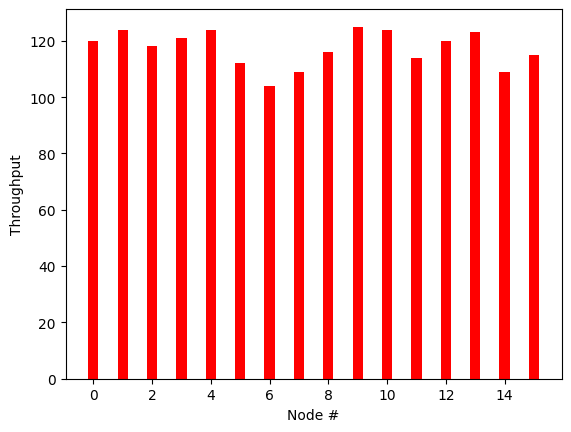

In [29]:
gui=False
numnodes=16
simtime=2000
ptime=1
load=100
retry=False
skew=False
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

***
### $\text{Warm Up 2}$


Protocol: TDMA
  Node 0 attempts 108 success 108 coll 0
  Node 1 attempts 106 success 106 coll 0
  Node 2 attempts 114 success 114 coll 0
  Node 3 attempts 117 success 117 coll 0
  Node 4 attempts 123 success 123 coll 0
  Node 5 attempts 112 success 112 coll 0
  Node 6 attempts 111 success 111 coll 0
  Node 7 attempts 120 success 120 coll 0
  Node 8 attempts 109 success 109 coll 0
  Node 9 attempts 117 success 117 coll 0
  Node 10 attempts 119 success 119 coll 0
  Node 11 attempts 123 success 123 coll 0
  Node 12 attempts 109 success 109 coll 0
  Node 13 attempts 124 success 124 coll 0
  Node 14 attempts 119 success 119 coll 0
  Node 15 attempts 123 success 122 coll 0
Time 14000 attempts 1854 success 1853 util 0.93
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


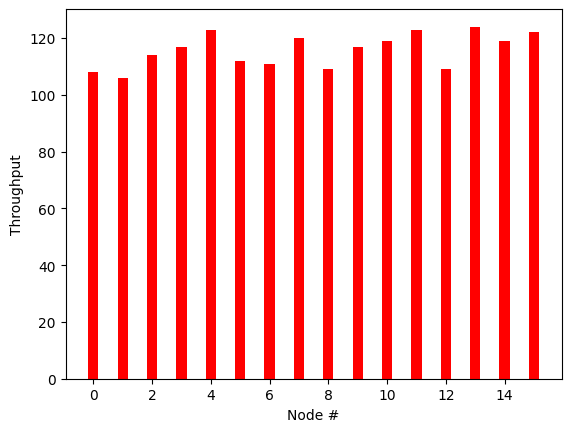

In [30]:
gui=False
numnodes=16
simtime=14000
ptime=7
load=100
retry=False
skew=False
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

*** 
### $\text{Warm Up 3}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  1.9073486328125e-06  to node  19
  Node 0 attempts 499 success 499 coll 0
  Node 1 attempts 499 success 499 coll 0
  Node 2 attempts 497 success 497 coll 0
  Node 3 attempts 499 success 499 coll 0
  Node 4 attempts 348 success 348 coll 0
  Node 5 attempts 143 success 143 coll 0
  Node 6 at

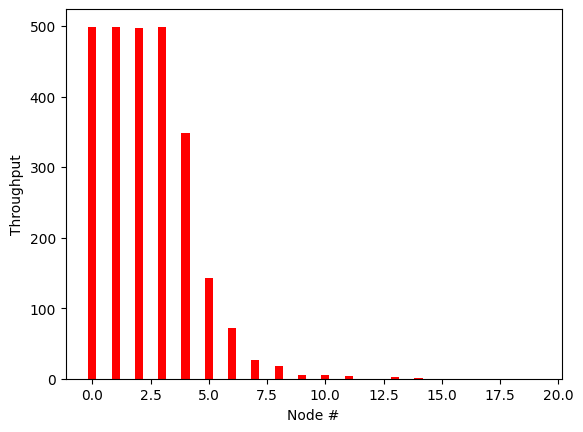

In [31]:
gui=False
numnodes=20
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

***
### $\text{Configuration \#1}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.001953125  to node  9
  Node 0 attempts 999 success 999 coll 0
  Node 1 attempts 1000 success 1000 coll 0
  Node 2 attempts 999 success 999 coll 0
  Node 3 attempts 649 success 649 coll 0
  Node 4 attempts 313 success 313 coll 0
  Node 5 attempts 164 success 164 coll 0
  Node 6 attempts 76 success 76 coll 0
  Node 7 attempts 49 success 49 coll 0
  Node 8 attempts 26 success 26 coll 0
  Node 9 attempts 25 success 25 coll 0
Time 10000 attempts 4300 success 4300 util 0.43
Inter-node fairness: 0.52
Inter-node weighted fairness: 0.87


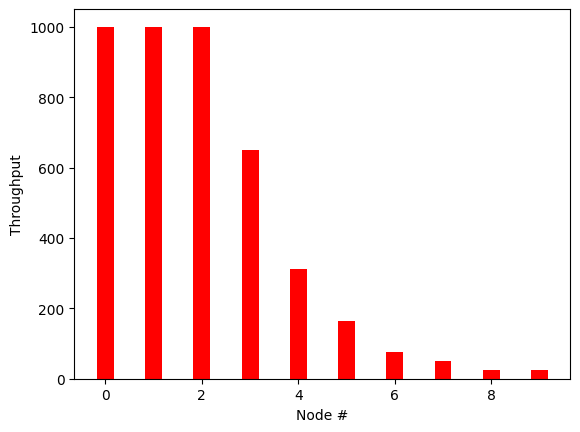

In [12]:
gui=False
numnodes=10
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

***
### $\text{Configuration \#2}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  1.9073486328125e-06  to node  19
  Node 0 attempts 499 success 499 coll 0
  Node 1 attempts 500 success 500 coll 0
  Node 2 attempts 499 success 499 coll 0
  Node 3 attempts 499 success 499 coll 0
  Node 4 attempts 289 success 289 coll 0
  Node 5 attempts 166 success 166 coll 0
  Node 6 at

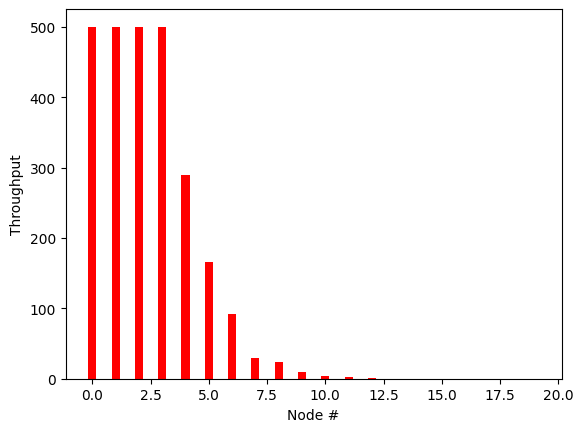

In [13]:
gui=False
numnodes=20
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

***
### $\text{Configuration \#3}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  9.5367431640625e-07  to node  19
attaching  4.76837158203125e-07  to node  20
attaching  2.384185791015625e-07  to node  21
attaching  1.1920928955078125e-07  to node  22
attaching  5.960464477539063e-08  to node  23
attaching  2.9802322387695312e-08  to node  24
attaching  1.4901161193847

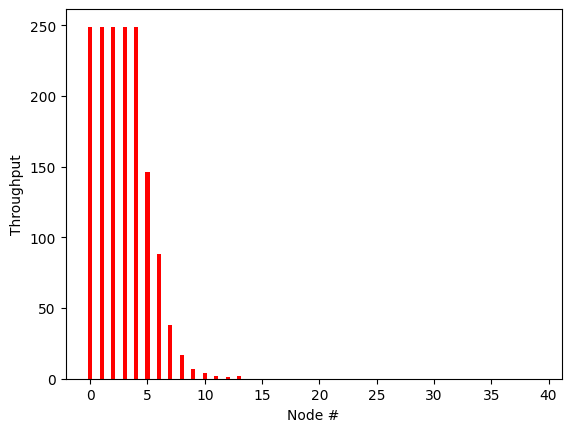

In [34]:
gui=False
numnodes=40
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

***
### $\text{Configuration \#4}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  9.5367431640625e-07  to node  19
attaching  4.76837158203125e-07  to node  20
attaching  2.384185791015625e-07  to node  21
attaching  1.1920928955078125e-07  to node  22
attaching  5.960464477539063e-08  to node  23
attaching  2.9802322387695312e-08  to node  24
attaching  1.4901161193847

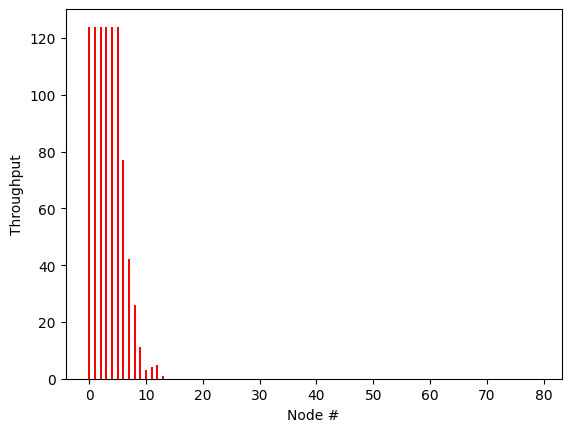

In [35]:
gui=False
numnodes=80
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

## $\text{25\% Utilization}$

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  9.5367431640625e-07  to node  19
attaching  9.5367431640625e-07  to node  20
  Node 0 attempts 476 success 476 coll 0
  Node 1 attempts 476 success 476 coll 0
  Node 2 attempts 475 success 475 coll 0
  Node 3 attempts 475 success 474 coll 0
  Node 4 attempts 308 success 308 coll 0
  Node 5

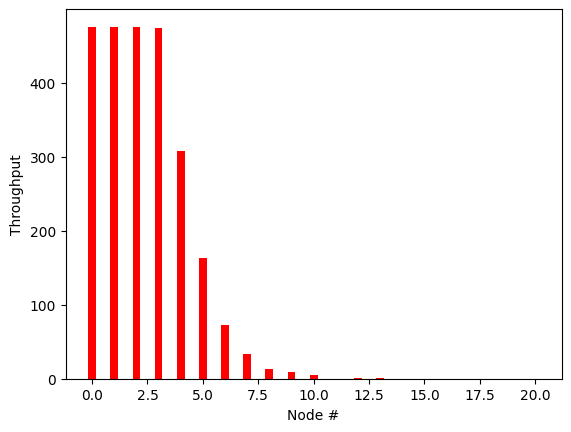

In [37]:
gui=False
numnodes=21
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  9.5367431640625e-07  to node  19
attaching  4.76837158203125e-07  to node  20
attaching  4.76837158203125e-07  to node  21
  Node 0 attempts 454 success 454 coll 0
  Node 1 attempts 455 success 455 coll 0
  Node 2 attempts 453 success 453 coll 0
  Node 3 attempts 455 success 455 coll 0
  N

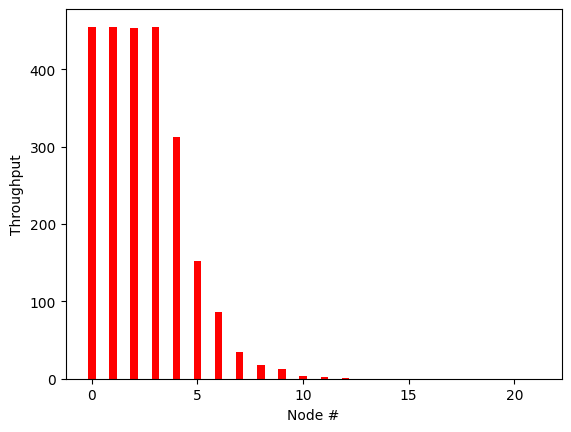

In [27]:
gui=False
numnodes=22
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

Protocol: TDMA
attaching  0.5  to node  0
attaching  0.25  to node  1
attaching  0.125  to node  2
attaching  0.0625  to node  3
attaching  0.03125  to node  4
attaching  0.015625  to node  5
attaching  0.0078125  to node  6
attaching  0.00390625  to node  7
attaching  0.001953125  to node  8
attaching  0.0009765625  to node  9
attaching  0.00048828125  to node  10
attaching  0.000244140625  to node  11
attaching  0.0001220703125  to node  12
attaching  6.103515625e-05  to node  13
attaching  3.0517578125e-05  to node  14
attaching  1.52587890625e-05  to node  15
attaching  7.62939453125e-06  to node  16
attaching  3.814697265625e-06  to node  17
attaching  1.9073486328125e-06  to node  18
attaching  9.5367431640625e-07  to node  19
attaching  4.76837158203125e-07  to node  20
attaching  4.76837158203125e-07  to node  21
  Node 0 attempts 454 success 454 coll 0
  Node 1 attempts 454 success 454 coll 0
  Node 2 attempts 455 success 455 coll 0
  Node 3 attempts 454 success 454 coll 0
  N

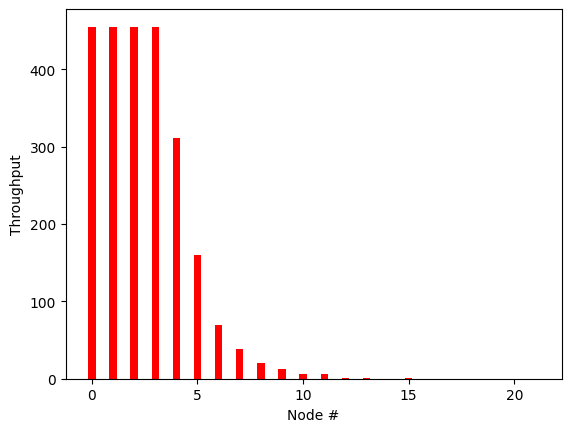

In [28]:
gui=False
numnodes=22
simtime=10000
ptime=1
load=100
retry=False
skew=True
    
print ('Protocol: TDMA')
wnet = TDMAWirelessNetwork(numnodes,'TDMA',ptime,
                               'exponential',load,retry,'None',
                               skew,0,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    succ = []
    for node in wnet.nlist: succ.append(node.stats.success)
    for node in wnet.nlist:
        if node.stats.collisions > 0: 
            print ("ERROR! TDMA should not have collisions")
    ind = numpy.arange(len(wnet.nlist))
    width = 0.35
    p.bar(ind, succ, width, color = 'r')
    p.ylabel('Throughput')
    p.xlabel('Node #')
    p.show()

## $\text{Stabilized ALOHA (with backoff)}$

In [2]:
class AlohaNode(WirelessNode):
    def __init__(self,location,network,retry):
        WirelessNode.__init__(self,location,network,retry)

        self.sent = []
        self.coll = []

        # initialize local probability of transmission
        self.p = self.network.pmax

    def channel_access(self,time,ptime,numnodes):

        if (random.uniform(0, 1) < self.p) and (time % ptime == 0) : 
            return True
        
        return False

    def on_collision(self,packet):
        # for plots of collisions
        self.coll.append(self.network.time)

        self.p = max(self.network.pmin, self.p/2) 

    def on_xmit_success(self,packet):
        # for plots of successful transmissions
        self.sent.append(self.network.time)

        self.p = min(self.network.pmax, self.p*2)

In [3]:
class AlohaWirelessNetwork(WirelessNetwork):
    def __init__(self,n,chantype,ptime,dist,load,retry,backoff,
		 skew,qmax,pmax,pmin,simtime):
        if pmax < pmin:
            return "ValueError"
        
        self.pmax = pmax
        self.pmin = pmin
        WirelessNetwork.__init__(self,n,chantype,ptime,dist,load,retry,backoff,
                                 skew,qmax,simtime)

    def make_node(self,loc,retry):
        return AlohaNode(loc,self,retry)

Protocol: Aloha with stabilization
  Node 0 attempts 824 success 752 coll 72
  Node 1 attempts 1382 success 1139 coll 243
  Node 2 attempts 20 success 4 coll 16
  Node 3 attempts 21 success 5 coll 16
  Node 4 attempts 65 success 30 coll 35
  Node 5 attempts 1044 success 996 coll 48
  Node 6 attempts 1480 success 1297 coll 183
  Node 7 attempts 754 success 582 coll 172
Time 10000 attempts 5590 success 4805 util 0.48
Inter-node fairness: 0.59
Inter-node weighted fairness: 0.59


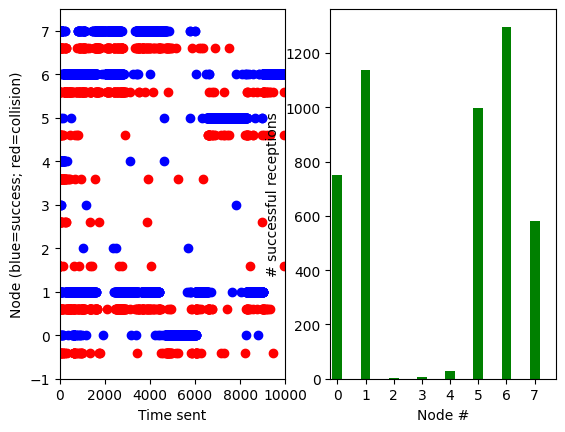

In [70]:
gui=False
numnodes=8
simtime=10000
backoff='Mine'
ptime=1
pmax=1.0
pmin=0.0
load=100
retry=True
skew=False
print ('Protocol: Aloha with stabilization')
wnet = AlohaWirelessNetwork(numnodes,'Aloha',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet) 

Protocol: Aloha with stabilization
  Node 0 attempts 5184 success 3427 coll 1757
  Node 1 attempts 4967 success 3209 coll 1758
  Node 2 attempts 5509 success 3599 coll 1910
  Node 3 attempts 5148 success 3340 coll 1808
  Node 4 attempts 4164 success 2645 coll 1519
  Node 5 attempts 4331 success 2772 coll 1559
  Node 6 attempts 4335 success 2765 coll 1570
  Node 7 attempts 4898 success 3178 coll 1720
Time 70000 attempts 38536 success 24935 util 0.36
Inter-node fairness: 0.99
Inter-node weighted fairness: 0.99


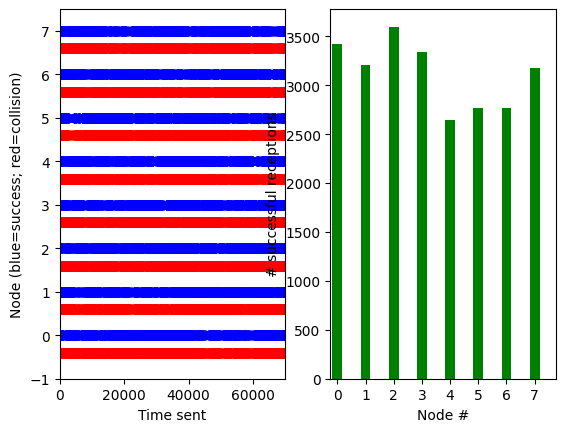

In [104]:
gui=False
numnodes=8
simtime=70000
backoff='Mine'
ptime=1
pmax=0.3
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: Aloha with stabilization')
wnet = AlohaWirelessNetwork(numnodes,'Aloha',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet) 

Protocol: Aloha with stabilization
  Node 0 attempts 697 success 651 coll 46
  Node 1 attempts 767 success 712 coll 55
  Node 2 attempts 684 success 650 coll 34
  Node 3 attempts 658 success 622 coll 36
  Node 4 attempts 642 success 604 coll 38
  Node 5 attempts 729 success 675 coll 54
  Node 6 attempts 685 success 641 coll 44
  Node 7 attempts 703 success 661 coll 42
Time 70000 attempts 5565 success 5216 util 0.07
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


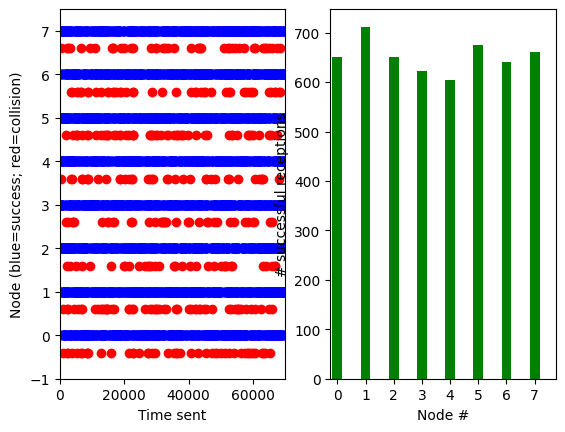

In [79]:
gui=False
numnodes=8
simtime=70000
backoff='Mine'
ptime=1
pmax=0.01
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: Aloha with stabilization')
wnet = AlohaWirelessNetwork(numnodes,'Aloha',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet) 

Protocol: Aloha with stabilization
  Node 0 attempts 629 success 405 coll 224
  Node 1 attempts 424 success 275 coll 149
  Node 2 attempts 354 success 214 coll 140
  Node 3 attempts 551 success 346 coll 205
  Node 4 attempts 514 success 342 coll 172
  Node 5 attempts 459 success 273 coll 186
  Node 6 attempts 302 success 175 coll 127
  Node 7 attempts 572 success 373 coll 199
Time 70000 attempts 3805 success 2403 util 0.34
Inter-node fairness: 0.94
Inter-node weighted fairness: 0.94


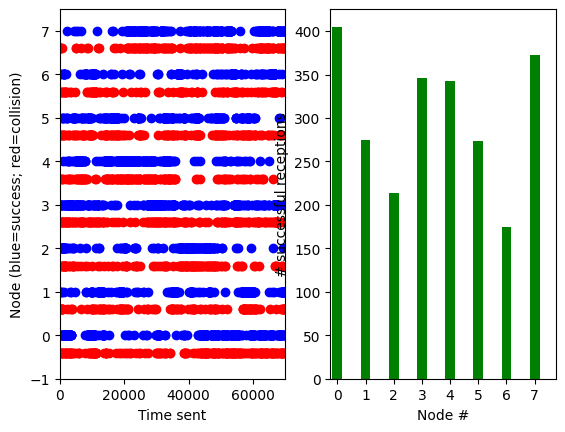

In [106]:
gui=False
numnodes=8
simtime=70000
backoff='Mine'
ptime=10
pmax=0.3
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: Aloha with stabilization')
wnet = AlohaWirelessNetwork(numnodes,'Aloha',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet) 

Protocol: Aloha with stabilization
  Node 0 attempts 79 success 71 coll 8
  Node 1 attempts 69 success 67 coll 2
  Node 2 attempts 70 success 64 coll 6
  Node 3 attempts 79 success 70 coll 9
  Node 4 attempts 70 success 66 coll 4
  Node 5 attempts 67 success 63 coll 4
  Node 6 attempts 74 success 73 coll 1
  Node 7 attempts 58 success 54 coll 4
Time 70000 attempts 566 success 528 util 0.08
Inter-node fairness: 0.99
Inter-node weighted fairness: 0.99


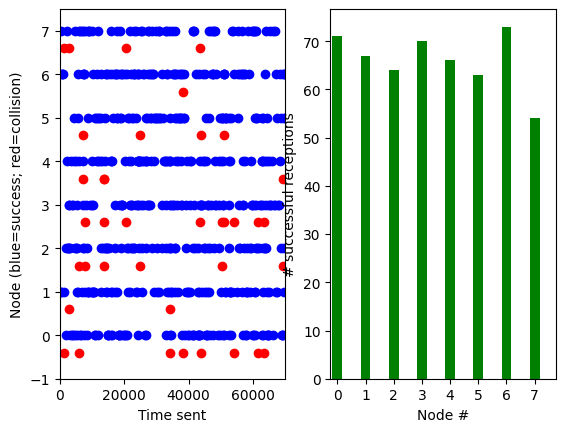

In [80]:
gui=False
numnodes=8
simtime=70000
backoff='Mine'
ptime=10
pmax=0.01
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: Aloha with stabilization')
wnet = AlohaWirelessNetwork(numnodes,'Aloha',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)
    
if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet) 

## $\text{CSMA}$

In [197]:
class CSMANode(WirelessNode):
    def __init__(self,location,network,retry):
        WirelessNode.__init__(self,location,network,retry)

        # for plots of collisions/success
        self.sent = []
        self.coll = []

        # initialize local probability of transmission
        self.p = self.network.pmax

    def channel_access(self,time,ptime,numnodes):
        if (random.uniform(0, 1) < self.p) and self.network.channel_idle():
            return True
        return False

    def on_collision(self,packet):
        # for plots of collisions
        self.coll.append(self.network.time)

        self.p = max(self.network.pmin, self.p/2)     

    def on_xmit_success(self,packet):
        # for plots of successful transmissions
        self.sent.append(self.network.time)

        self.p = min(self.network.pmax, self.p*2)  

In [198]:
class CSMAWirelessNetwork(WirelessNetwork):
    def __init__(self,n,chantype,ptime,dist,load,retry,backoff,
		 skew,qmax,pmax,pmin,simtime):
        self.pmax = pmax
        self.pmin = pmin        
        WirelessNetwork.__init__(self,n,chantype,ptime,dist,load,retry,backoff,
                                 skew,qmax,simtime)

    def make_node(self,loc,retry):
        return CSMANode(loc,self,retry)

Protocol: CSMA with stabilization
  Node 0 attempts 2469 success 404 coll 2065
  Node 1 attempts 2608 success 463 coll 2145
  Node 2 attempts 2523 success 401 coll 2122
  Node 3 attempts 2576 success 453 coll 2123
  Node 4 attempts 2636 success 476 coll 2159
  Node 5 attempts 2562 success 425 coll 2136
  Node 6 attempts 2530 success 428 coll 2102
  Node 7 attempts 2484 success 412 coll 2072
Time 100000 attempts 20388 success 3462 util 0.35
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


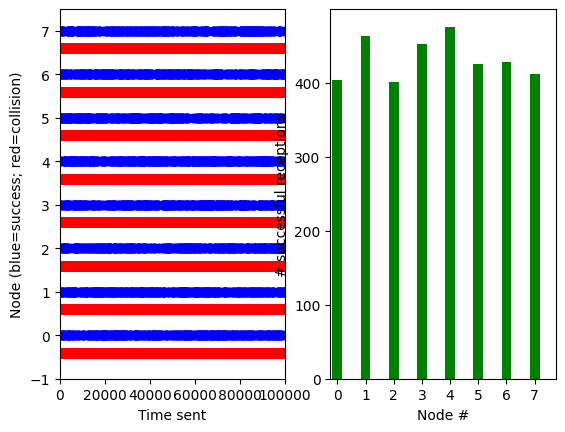

In [199]:
gui=False
numnodes=8
simtime=100000
backoff='Mine'
ptime=10
pmax=0.8
pmin=0.2
load=100
retry=True
skew=False
print ('Protocol: CSMA with stabilization')
wnet = CSMAWirelessNetwork(numnodes,'CSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

Protocol: CSMA with stabilization
  Node 0 attempts 1687 success 1209 coll 478
  Node 1 attempts 366 success 228 coll 138
  Node 2 attempts 1486 success 1210 coll 276
  Node 3 attempts 1582 success 1194 coll 388
  Node 4 attempts 741 success 570 coll 171
  Node 5 attempts 1696 success 1218 coll 478
  Node 6 attempts 1310 success 991 coll 319
  Node 7 attempts 1455 success 1173 coll 281
Time 100000 attempts 10323 success 7793 util 0.78
Inter-node fairness: 0.89
Inter-node weighted fairness: 0.89


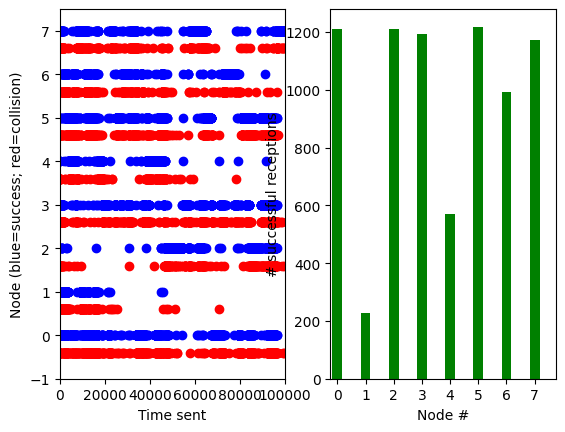

In [200]:
gui=False
numnodes=8
simtime=100000
backoff='Mine'
ptime=10
pmax=1.0
pmin=0.0
load=100
retry=True
skew=False
print ('Protocol: CSMA with stabilization')
wnet = CSMAWirelessNetwork(numnodes,'CSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

Protocol: CSMA with stabilization
  Node 0 attempts 1455 success 1092 coll 363
  Node 1 attempts 1304 success 943 coll 361
  Node 2 attempts 1335 success 965 coll 370
  Node 3 attempts 1386 success 1038 coll 348
  Node 4 attempts 1604 success 1252 coll 352
  Node 5 attempts 1471 success 1070 coll 401
  Node 6 attempts 1408 success 1071 coll 337
  Node 7 attempts 932 success 683 coll 248
Time 100000 attempts 10895 success 8114 util 0.81
Inter-node fairness: 0.98
Inter-node weighted fairness: 0.98


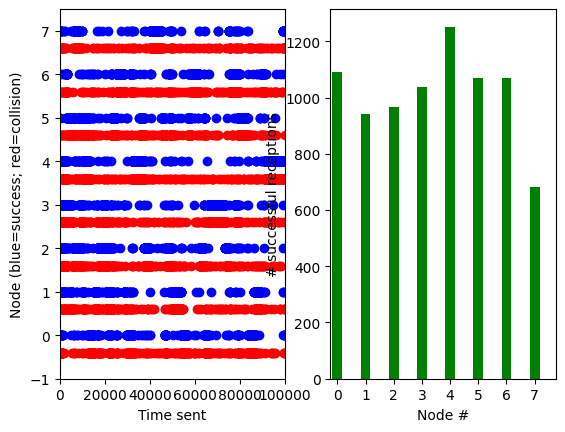

In [201]:
gui=False
numnodes=8
simtime=100000
backoff='Mine'
ptime=10
pmax=0.95
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: CSMA with stabilization')
wnet = CSMAWirelessNetwork(numnodes,'CSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

Protocol: CSMA with stabilization
  Node 0 attempts 1469 success 1137 coll 332
  Node 1 attempts 1450 success 1069 coll 381
  Node 2 attempts 1549 success 1233 coll 316
  Node 3 attempts 1096 success 776 coll 320
  Node 4 attempts 1292 success 921 coll 370
  Node 5 attempts 1066 success 784 coll 282
  Node 6 attempts 1540 success 1103 coll 437
  Node 7 attempts 1424 success 1032 coll 392
Time 100000 attempts 10886 success 8055 util 0.81
Inter-node fairness: 0.98
Inter-node weighted fairness: 0.98


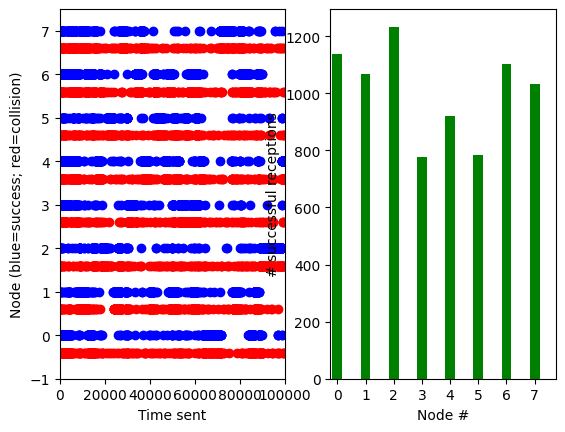

In [202]:
gui=False
numnodes=8
simtime=100000
backoff='Mine'
ptime=10
pmax=0.95
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: CSMA with stabilization')
wnet = CSMAWirelessNetwork(numnodes,'CSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

Protocol: CSMA with stabilization
  Node 0 attempts 1121 success 777 coll 344
  Node 1 attempts 1493 success 1106 coll 387
  Node 2 attempts 995 success 682 coll 313
  Node 3 attempts 1547 success 1188 coll 359
  Node 4 attempts 1407 success 1062 coll 344
  Node 5 attempts 1342 success 1003 coll 339
  Node 6 attempts 1387 success 1062 coll 325
  Node 7 attempts 1582 success 1191 coll 391
Time 100000 attempts 10874 success 8071 util 0.81
Inter-node fairness: 0.97
Inter-node weighted fairness: 0.97


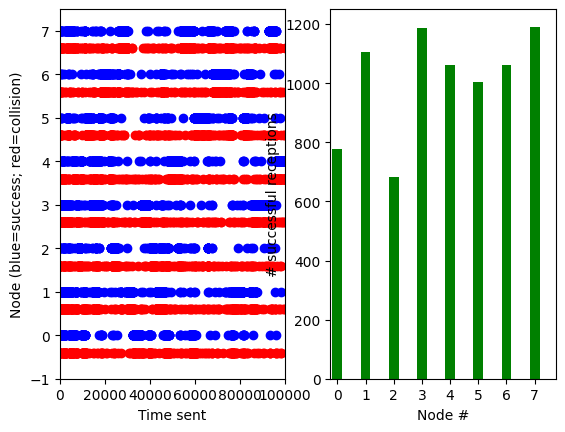

In [204]:
gui=False
numnodes=8
simtime=100000
backoff='Mine'
ptime=10
pmax=0.95
pmin=0.01
load=100
retry=True
skew=False
print ('Protocol: CSMA with stabilization')
wnet = CSMAWirelessNetwork(numnodes,'CSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,pmax,pmin,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

## $\text{CSMA with Contention Window}$

### $\text{Implementation 1}$

In [314]:
class WinCSMANode(WirelessNode):
    def __init__(self,location,network,retry):
        WirelessNode.__init__(self,location,network,retry)
        self.cw = self.network.cwmin 
        self.counter = 0

        # for plots of collisions/success
        self.sent = []
        self.coll = []

    def channel_access(self,time,ptime,numnodes):
        if self.counter > 0:
            self.counter -= 1
            return False
        
        elif self.counter <= 0 :
            return not self.network.channel_busy()
        
        elif self.network.channel_busy():
            self.counter = random.randint(self.network.cwmin , self.cw)
            return False
        

    def on_collision(self,packet):
        # for plots of collisions
        self.coll.append(self.network.time)

        self.cw = min(self.network.cwmax, self.cw*2) 
        pass

    def on_xmit_success(self,packet):
        # for plots of successful transmissions
        self.sent.append(self.network.time)

        self.cw = max(self.network.cwmin, self.cw/2) 

In [315]:
class WinCSMAWirelessNetwork(WirelessNetwork):
    def __init__(self,n,chantype,ptime,dist,load,retry,backoff,
		 skew,qmax,cwmin,cwmax,simtime):
        self.cwmin = cwmin
        self.cwmax = cwmax      
        WirelessNetwork.__init__(self,n,chantype,ptime,dist,load,retry,backoff,
                                 skew,qmax,simtime)

    def make_node(self,loc,retry):
        return WinCSMANode(loc,self,retry)

Protocol: Windowed CSMA with stabilization
  Node 0 attempts 639 success 335 coll 304
  Node 1 attempts 624 success 339 coll 285
  Node 2 attempts 610 success 319 coll 291
  Node 3 attempts 653 success 350 coll 303
  Node 4 attempts 633 success 324 coll 309
  Node 5 attempts 623 success 365 coll 258
  Node 6 attempts 635 success 332 coll 303
  Node 7 attempts 618 success 308 coll 310
  Node 8 attempts 557 success 286 coll 270
  Node 9 attempts 620 success 320 coll 300
  Node 10 attempts 638 success 304 coll 333
  Node 11 attempts 666 success 365 coll 301
  Node 12 attempts 655 success 345 coll 310
  Node 13 attempts 652 success 337 coll 314
  Node 14 attempts 642 success 321 coll 321
  Node 15 attempts 625 success 319 coll 306
Time 100000 attempts 10090 success 5269 util 0.53
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


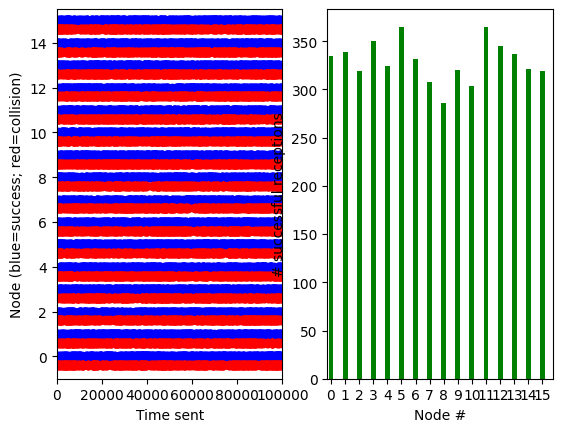

In [316]:
gui=False
numnodes=16
simtime=100000
backoff='Mine'
ptime=10
cwmin=1
cwmax=512
load=100
retry=False
skew=False
print ('Protocol: Windowed CSMA with stabilization')

wnet = WinCSMAWirelessNetwork(numnodes,'WinCSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,cwmin,cwmax,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)

### $\text{Implementation 2}$

In [318]:
class WinCSMANode(WirelessNode):
    def __init__(self,location,network,retry):
        WirelessNode.__init__(self,location,network,retry)
        self.cw = self.network.cwmin 
        self.counter = None

        # for plots of collisions/success
        self.sent = []
        self.coll = []


    def channel_access(self,time,ptime,numnodes):
        if self.counter is None:
            self.counter = random.randint(1, self.cw)
        
        elif not self.network.channel_busy():
            self.counter -= 1
        
        if self.counter < 0 and not self.network.channel_busy():
            self.counter = None
            return True
        
        return False


    def on_collision(self,packet):
        # for plots of collisions
        self.coll.append(self.network.time)

        self.cw = min(self.network.cwmax, self.cw*2) 

    def on_xmit_success(self,packet):
        # for plots of successful transmissions
        self.sent.append(self.network.time)

        self.cw = max(self.network.cwmin, self.cw/2) 

In [319]:
class WinCSMAWirelessNetwork(WirelessNetwork):
    def __init__(self,n,chantype,ptime,dist,load,retry,backoff,
		 skew,qmax,cwmin,cwmax,simtime):
        self.cwmin = cwmin
        self.cwmax = cwmax      
        WirelessNetwork.__init__(self,n,chantype,ptime,dist,load,retry,backoff,
                                 skew,qmax,simtime)

    def make_node(self,loc,retry):
        return WinCSMANode(loc,self,retry)

Protocol: Windowed CSMA with stabilization
  Node 0 attempts 631 success 407 coll 224
  Node 1 attempts 606 success 389 coll 217
  Node 2 attempts 598 success 364 coll 234
  Node 3 attempts 594 success 364 coll 230
  Node 4 attempts 589 success 369 coll 220
  Node 5 attempts 631 success 385 coll 246
  Node 6 attempts 600 success 352 coll 248
  Node 7 attempts 622 success 386 coll 236
  Node 8 attempts 665 success 430 coll 235
  Node 9 attempts 655 success 399 coll 256
  Node 10 attempts 605 success 383 coll 222
  Node 11 attempts 627 success 400 coll 227
  Node 12 attempts 584 success 371 coll 213
  Node 13 attempts 639 success 412 coll 227
  Node 14 attempts 628 success 386 coll 241
  Node 15 attempts 612 success 374 coll 238
Time 100000 attempts 9886 success 6171 util 0.62
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


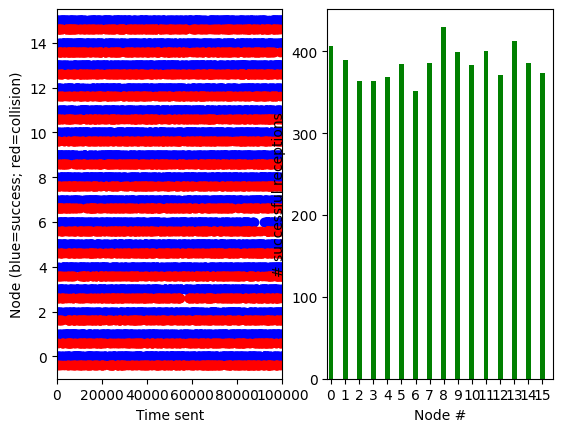

In [320]:
gui=False
numnodes=16
simtime=100000
backoff='Mine'
ptime=10
cwmin=1
cwmax=512
load=100
retry=False
skew=False
print ('Protocol: Windowed CSMA with stabilization')

wnet = WinCSMAWirelessNetwork(numnodes,'WinCSMA',ptime,
                            'exponential',load,retry,backoff,
                            skew,0,cwmin,cwmax,simtime)

if gui == True:
    sim = NetSim()
    sim.SetNetwork(wnet)
    sim.MainLoop()
else:
    wnet.step(simtime)
    plot_data(wnet)